[[ 6.14254203e-01  5.46216187e+00]
 [-1.46941473e+00  3.91045929e+00]
 [-3.76722614e-01  5.25126029e-01]
 [ 6.83040683e-01  5.53177712e-01]
 [ 2.78545188e+00 -1.17326181e+00]
 [ 4.45145968e+00 -8.21388819e-01]
 [-1.27751470e+00 -1.44385735e+00]
 [ 1.72443406e+00 -3.81301443e+00]
 [ 2.93183928e-01  2.79984254e-01]
 [-3.69306756e+00  2.00679847e+00]
 [ 1.78536350e+00  2.01319565e+00]
 [-4.21702406e+00 -2.68680663e+00]
 [ 4.98031475e-01 -1.94248199e-01]
 [ 4.19792342e-03  2.69631280e-01]
 [-9.60516676e-01 -7.43963937e-02]
 [-2.33209868e+00  2.78890136e-01]
 [ 5.15858804e-02  3.39125746e-01]
 [ 4.07976499e+00  1.57967101e+00]
 [ 2.18893984e-01  9.47387967e-01]
 [ 5.12242050e+00 -2.81174003e+00]
 [ 1.03026929e+00  3.05632199e+00]
 [ 8.52125665e-01  1.11359409e+00]
 [-1.79472106e+00 -3.39355763e+00]
 [ 4.29182979e-01 -4.97190606e-01]
 [ 4.43876525e+00  5.14684492e+00]
 [ 1.49424849e+00 -1.06036940e-01]
 [-1.94256765e-01  7.82583550e-01]
 [-6.49697826e-01  1.13899399e+00]
 [ 2.39223522e-01  4

[]

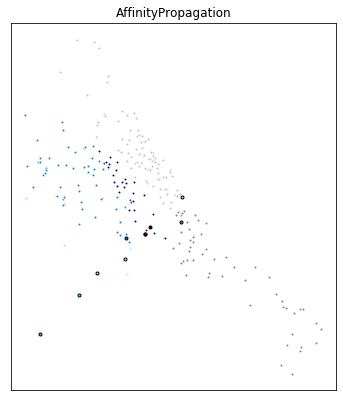

In [1]:
%matplotlib inline
from time import time
import numpy as np
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances_argmin

np.random.seed(30)

digits = load_digits()
data = scale(digits.data)
reduced_data = PCA(n_components=2).fit_transform(data)
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

reduced_data = PCA(n_components=2).fit_transform(data)
AP = AffinityPropagation()
AP.fit(reduced_data)
print(AP.cluster_centers_)
AP_cluster_centers = np.sort(AP.cluster_centers_, axis=0)
print(len(AP_cluster_centers))
AP_labels = pairwise_distances_argmin(reduced_data, AP_cluster_centers)
n_clusters=len(AP.cluster_centers_)

fig = plt.figure(figsize=(16, 6))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#FF8080', '#00FFFF', '#80FF80','#80FFFF','#0080FF','#FF00FF','#800000','#0000A0','#808080','#C0C0C0']
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = AP_labels == k
    cluster_center = AP_cluster_centers[k]
    ax.plot(reduced_data[my_members, 0], reduced_data[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=3)
ax.set_title('AffinityPropagation')
ax.set_xticks(())
ax.set_yticks(())